# Portfolio Optimization and Performance Evaluation

In this case study, we will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. To build these two portfolios, we will:
1. Import two years of data for four stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [2]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set start and end date parameters
startdate = '2019-01-01'
enddate = '2024-11-18'

# List the four stock ticker symbols for our portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list and return the Adj Close
for i_stock in stock_list:
        stock_data = yf.download(i_stock, start=startdate, end=enddate)
        stocks[i_stock] = stock_data[['Adj Close']]

# Optionally, you can concatenate all the DataFrames into one DataFrame
stocks_df = pd.concat(stocks.values(), axis=1, keys=stocks.keys())

print(stocks_df.head())    

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hour

                  AMD       AAPL       MSFT       ORCL
            Adj Close  Adj Close  Adj Close  Adj Close
Date                                                  
2019-01-02  18.830000  37.708591  95.501335  41.159878
2019-01-03  17.049999  33.952538  91.988029  40.759384
2019-01-04  19.000000  35.401947  96.266312  42.516090
2019-01-07  20.570000  35.323162  96.389099  43.189659
2019-01-08  20.750000  35.996532  97.087982  43.581051


In [4]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1480 entries, 2019-01-02 to 2024-11-15
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AMD, Adj Close)   1480 non-null   float64
 1   (AAPL, Adj Close)  1480 non-null   float64
 2   (MSFT, Adj Close)  1480 non-null   float64
 3   (ORCL, Adj Close)  1480 non-null   float64
dtypes: float64(4)
memory usage: 57.8 KB


In [5]:
stocks_df.isna().sum()

AMD   Adj Close    0
AAPL  Adj Close    0
MSFT  Adj Close    0
ORCL  Adj Close    0
dtype: int64

No missing value

In [6]:
# Examine the 'AMD' Adj Close from the stocks dictionary
stocks['AMD'].head()

,Adj Close
Date,
2019-01-02,18.830000
2019-01-03,17.049999
2019-01-04,19.000000
2019-01-07,20.570000
2019-01-08,20.750000


Create a Copy: When you retrieve the data, use .copy() to ensure you're working with a new DataFrame and not a view of the original data.

In [7]:
stocks[i_stock] = stock_data[['Adj Close']].copy()

## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

.loc: Provides a way to access and modify specific rows and columns explicitly, reducing the risk of ambiguous assignments.

In [8]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data.loc[:, 'Normalized Return'] = stock_data['Adj Close'] / first_adj_close # Divide each row by the first Adj Close

In [9]:
stocks['AAPL'].head()

,Adj Close,Normalized Return
Date,,
2019-01-02,37.708591,1.000000
2019-01-03,33.952538,0.900393
2019-01-04,35.401947,0.938830
2019-01-07,35.323162,0.936740
2019-01-08,35.996532,0.954598


In [10]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25

In [11]:
stocks['AAPL'].head()

,Adj Close,Normalized Return,Allocation
Date,,,
2019-01-02,37.708591,1.000000,0.250000
2019-01-03,33.952538,0.900393,0.225098
2019-01-04,35.401947,0.938830,0.234707
2019-01-07,35.323162,0.936740,0.234185
2019-01-08,35.996532,0.954598,0.238649


In [12]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [13]:
stocks['AAPL'].head()

,Adj Close,Normalized Return,Allocation,Position Value
Date,,,,
2019-01-02,37.708591,1.000000,0.250000,2500.000000
2019-01-03,33.952538,0.900393,0.225098,2250.981555
2019-01-04,35.401947,0.938830,0.234707,2347.074344
2019-01-07,35.323162,0.936740,0.234185,2341.851068
2019-01-08,35.996532,0.954598,0.238649,2386.494102


## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [14]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [15]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000
2019-01-03,2263.674895,2250.981555,2408.029933,2475.674513
2019-01-04,2522.570377,2347.074344,2520.025283,2582.374675
2019-01-07,2731.014309,2341.851068,2523.239570,2623.286405
2019-01-08,2754.912385,2386.494102,2541.534682,2647.059055


In [16]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [17]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.981555,2408.029933,2475.674513,9398.360896
2019-01-04,2522.570377,2347.074344,2520.025283,2582.374675,9972.044678
2019-01-07,2731.014309,2341.851068,2523.239570,2623.286405,10219.391352
2019-01-08,2754.912385,2386.494102,2541.534682,2647.059055,10330.000224


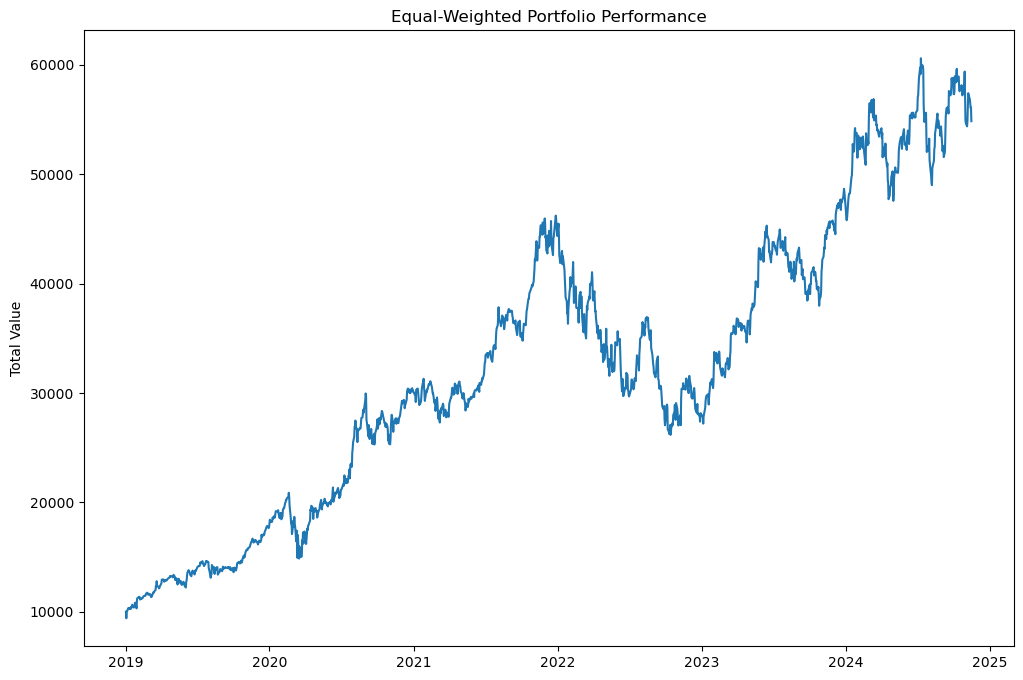

In [18]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

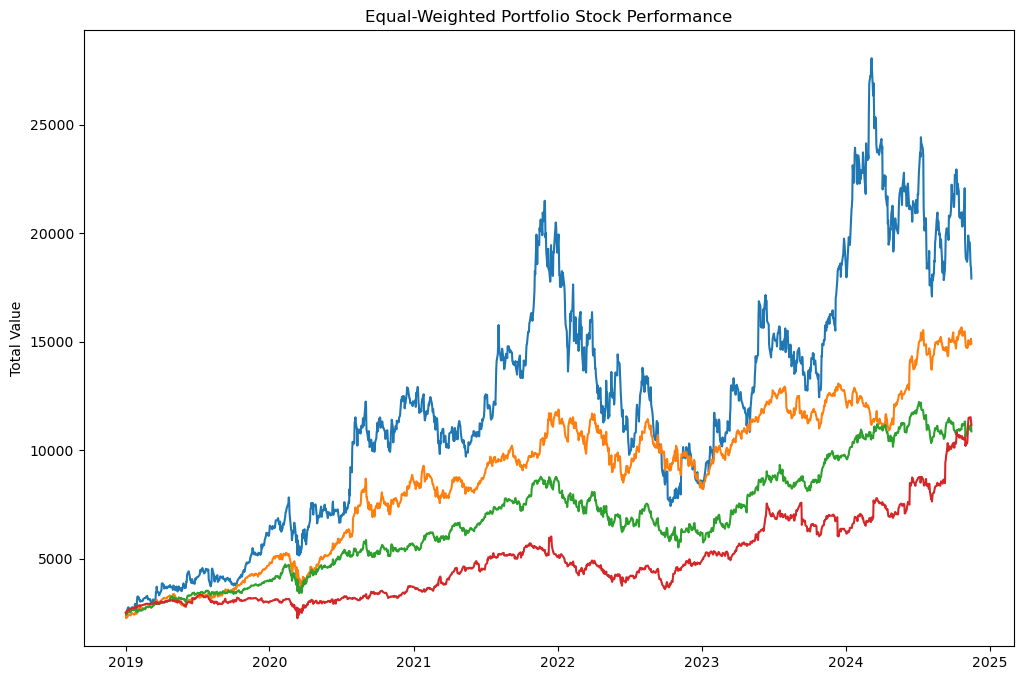

In [19]:
# View the four stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:4])

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value');

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [20]:
# Define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100,2)), '%')

448.51 %


/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_43881/3870122296.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = position_values['Total'][-1]
/var/folders/c4/xntd0yb16dz1d4dv_zrhdtvc0000gn/T/ipykernel_43881/3870122296.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_value = position_values['Total'][0]


In [21]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Return
Date,,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2019-01-03,2263.674895,2250.981555,2408.029933,2475.674513,9398.360896,-0.060164
2019-01-04,2522.570377,2347.074344,2520.025283,2582.374675,9972.044678,0.061041
2019-01-07,2731.014309,2341.851068,2523.239570,2623.286405,10219.391352,0.024804
2019-01-08,2754.912385,2386.494102,2541.534682,2647.059055,10330.000224,0.010823


In [22]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0014


In [23]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0203


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [24]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.06695582397538127

In [25]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5

sharpe_ratio_annualized

1.0628907543976498

## Prepare Scenarios to Optimize Portfolio Weighting
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [26]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [27]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,18.830000,37.708591,95.501335,41.159878
2019-01-03,17.049999,33.952538,91.988029,40.759384
2019-01-04,19.000000,35.401947,96.266312,42.516090
2019-01-07,20.570000,35.323162,96.389099,43.189659
2019-01-08,20.750000,35.996532,97.087982,43.581051


In [28]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099607,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043099
2019-01-07,0.082632,-0.002225,0.001275,0.015843
2019-01-08,0.008751,0.019063,0.007251,0.009062


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [30]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [31]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [32]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [33]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [34]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.2204980565741448


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [35]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

1.2608235290715997

In [37]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

9553

In [39]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.11320964 0.50175682 0.02590343 0.35913011]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios by using a scatter chart. We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

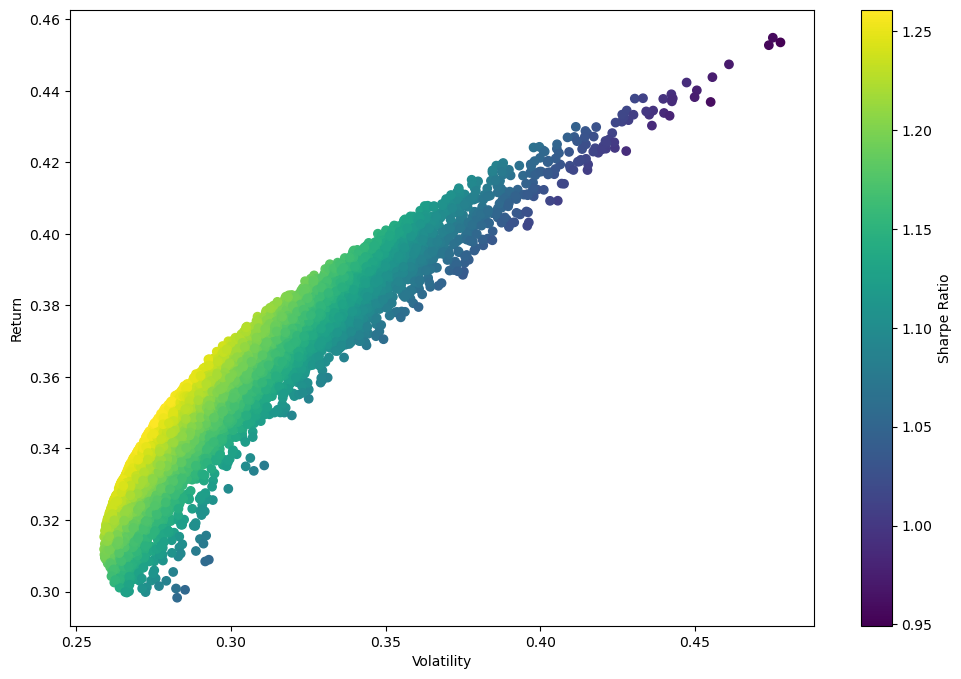

In [40]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

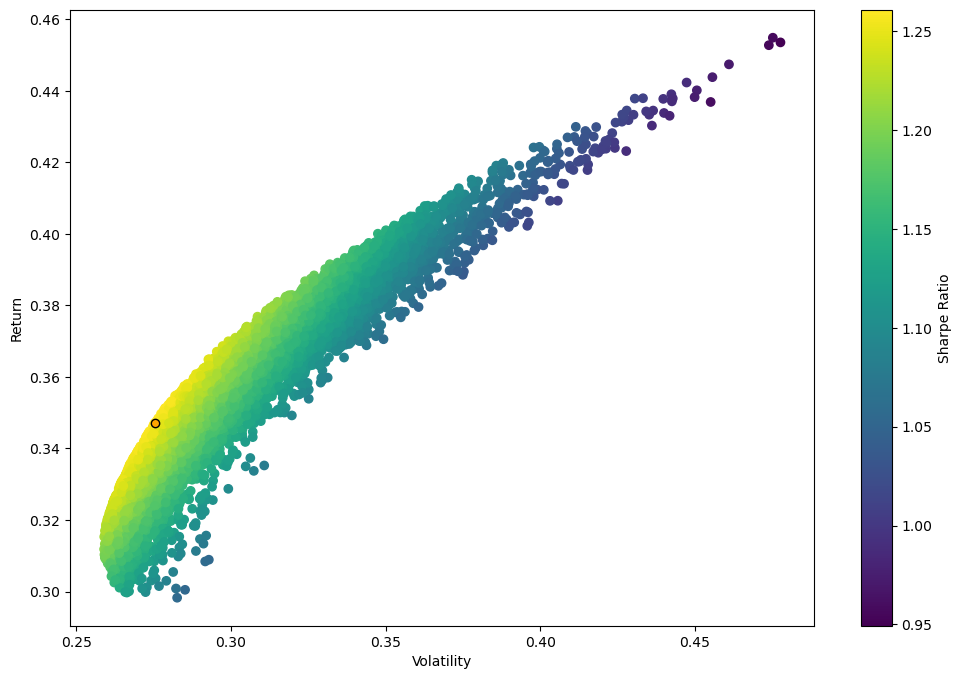

In [41]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');

## Evaluating Investment Performance for an individual stock

In [42]:
# import libraries
import pandas as pd
import numpy as np
import yfinance as yf

# extract AAPL stock data with a 15-minute timeframe
aapl = yf.Ticker("AAPL")
data = aapl.history(period="60d", interval="15m")

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-08-26 09:30:00-04:00,227.210007,227.210007,226.220093,226.544907,2594812,0.0,0.0
2024-08-26 09:45:00-04:00,226.577499,226.619995,226.039993,226.339996,960683,0.0,0.0
2024-08-26 10:00:00-04:00,226.350006,226.720001,225.300003,225.460007,1359929,0.0,0.0
2024-08-26 10:15:00-04:00,225.279999,225.320007,224.477203,224.949997,1335680,0.0,0.0
2024-08-26 10:30:00-04:00,224.919998,224.919998,223.890503,224.110001,1433484,0.0,0.0


In [43]:
# calculate the daily returns
data['returns'] = data['Close'].pct_change(1)

# Define risk-free rate
riskfree_rate = 0.02/252

# calculate the excess returns
data['excess_returns'] = data['returns'] - riskfree_rate

# calculate the sharpe ratio
sharpe_ratio = np.sqrt(252)*data['excess_returns'].mean()/data['excess_returns'].std()

# print the sharpe ratio
print('Sharpe Ratio:', sharpe_ratio)

Sharpe Ratio: -0.391133885615992


The sharpe ratio is below 1 which is considered bad

## Evaluating Investment Performance for a portfolio of stocks

In [2]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock starting data
stockStartDate = '2020-01-01'

In [4]:
# Get todays date and format it in the form YYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2024-11-18


In [5]:
df = yf.download(["AMZN", "AAPL", "NFLX", "GOOG", "TSLA"], start =stockStartDate, end=today)

# Get the stock portfolio Adj. Close price
df.head(5)

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py

Price       Adj Close                                                   Close  \
Ticker           AAPL       AMZN       GOOG        NFLX       TSLA       AAPL   
Date                                                                            
2020-01-02  72.796021  94.900497  68.201012  329.809998  28.684000  75.087502   
2020-01-03  72.088295  93.748497  67.866325  325.899994  29.534000  74.357498   
2020-01-06  72.662720  95.143997  69.539726  335.829987  30.102667  74.949997   
2020-01-07  72.320976  95.343002  69.496330  330.750000  31.270666  74.597504   
2020-01-08  73.484360  94.598503  70.043991  339.260010  32.809334  75.797501   

Price                                                    ...       Open  \
Ticker           AMZN       GOOG        NFLX       TSLA  ...       AAPL   
Date                                                     ...              
2020-01-02  94.900497  68.368500  329.809998  28.684000  ...  74.059998   
2020-01-03  93.748497  68.032997  325.899994  29.534000  ...  74.287498   
2020-01-06  95.143997  69.710503  335.829987  30.102667  ...  73.447502   
2020-01-07  95.343002  69.667000  330.750000  31.270666  ...  74.959999   
2020-01-08  94.598503  70.216003  339.260010  32.809334  ...  74.290001   

Price                                                       Volume            \
Ticker           AMZN       GOOG        NFLX       TSLA       AAPL      AMZN   
Date                                                                           
2020-01-02  93.750000  67.077499  326.100006  28.299999  135480400  80580000   
2020-01-03  93.224998  67.392998  326.779999  29.366667  146322800  75288000   
2020-01-06  93.000000  67.500000  323.119995  29.364668  118387200  81236000   
2020-01-07  95.224998  69.897003  336.470001  30.760000  108872000  80898000   
2020-01-08  94.902000  69.603996  331.489990  31.580000  132079200  70160000   

Price                                     
Ticker          GOOG     NFLX       TSLA  
Date                                      
2020-01-02  28132000  4485800  142981500  
2020-01-03  23728000  3806900  266677500  
2020-01-06  34646000  5663100  151995000  
2020-01-07  30054000  4703200  268231500  
2020-01-08  30560000  7104500  467164500  

[5 rows x 30 columns]

In [6]:
df = np.log(1 + df['Adj Close'].pct_change())
df.head(5)

Ticker,AAPL,AMZN,GOOG,NFLX,TSLA
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012213,-0.004919,-0.011926,0.029203
2020-01-06,0.007937,0.014776,0.024358,0.030014,0.019072
2020-01-07,-0.004714,0.002089,-0.000624,-0.015242,0.038067
2020-01-08,0.015958,-0.007839,0.007850,0.025404,0.048033


Notice that the first set of returns are NaN, so we can drop that row using the .dropna() method.

In [7]:
df_1 = df.dropna()
df_1.head(5)

Ticker,AAPL,AMZN,GOOG,NFLX,TSLA
Date,,,,,
2020-01-03,-0.009770,-0.012213,-0.004919,-0.011926,0.029203
2020-01-06,0.007937,0.014776,0.024358,0.030014,0.019072
2020-01-07,-0.004714,0.002089,-0.000624,-0.015242,0.038067
2020-01-08,0.015958,-0.007839,0.007850,0.025404,0.048033
2020-01-09,0.021018,0.004788,0.010984,-0.010668,-0.022189


###  2-Asset Frontier

In [8]:
df_2 = df_1[['AAPL','AMZN']]
df_2.head(5)

Ticker,AAPL,AMZN
Date,,
2020-01-03,-0.009770,-0.012213
2020-01-06,0.007937,0.014776
2020-01-07,-0.004714,0.002089
2020-01-08,0.015958,-0.007839
2020-01-09,0.021018,0.004788


#### Method 1:

As a first method, let's assume we have some weights, and let's try and compute the returns and volatility of a portfolio, given a set of weights, returns, and a covariance matrix.

In [9]:
weights = [0.5, 0.5]

# calculate return of 2 stock
weights[0]*df.AAPL.mean()+ weights[0]*df.AMZN.mean()

0.0007689051004510852

In [10]:
def portfolioreturn(weights):
    return np.dot(df_2.mean(), weights)

In [11]:
#  calculate the portfolio return
portfolioreturn(weights)

0.0007689051004510852

In [12]:
df_2.cov()

Ticker,AAPL,AMZN
Ticker,,
AAPL,0.000405,0.000273
AMZN,0.000273,0.000519


In [13]:
# calculate the portfolio variance
pv = weights[0]**2*df_2.cov().iloc[0,0]+ weights[1]**2*df_2.cov().iloc[1,1]+ 2*weights[0]*weights[1]* df.cov().iloc[0,1]
pv

0.00036750012502212816

In [14]:
# calculate the portfolio standard deviation
pv**(1/2)

0.019170292773511004

In [15]:
# Annualize the portfolio standard deviation
pv**(1/2)*np.sqrt(250)

0.3031089428828058

In [16]:
np.dot(np.dot(df_2.cov(), weights), weights)

0.0003675001250221284

In [17]:
# Annualize the portfolio standard deviation
def portfoliostd(weights):
    return np.dot(np.dot(df_2.cov(), weights), weights)**(1/2)*np.sqrt(250)

In [18]:
portfoliostd(weights)

0.3031089428828059

In [19]:
def weightscreator(df_2):
    rand = np.random.random(len(df_2.columns))
    rand /= rand.sum()
    return rand

In [20]:
weightscreator(df_2)

array([0.60230904, 0.39769096])

In [21]:
returns =[]
stds = []
w =[]

for i in range(500):
    weights = weightscreator(df_2)
    returns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

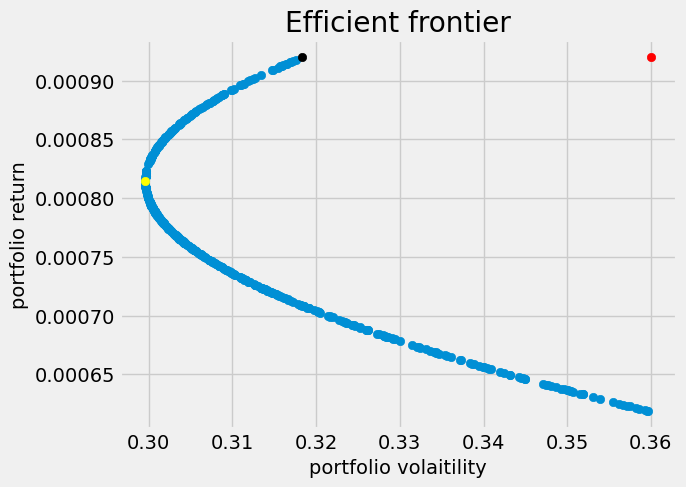

In [24]:
# plot the efficient frontier
plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250), df.mean().iloc[0], c='k')
plt.scatter(df.std().iloc[1]*np.sqrt(250), df.mean().iloc[0], c='red')
plt.scatter(min(stds), returns[stds.index(min(stds))], c='yellow')
plt.title('Efficient frontier')
plt.xlabel('portfolio volaitility')
plt.ylabel('portfolio return')
plt.show()

In [25]:
returns[stds.index(min(stds))]

0.0008141389382900104

#### Method 2:

We are going to explore different portfolio weightings between two assets, which is useful for visualizing the Efficient Frontier and understanding the trade-off between risk and return for different portfolio compositions.

In [41]:
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

After having a sequence of weights, we have got to figure out what is the return and volatility corresponding to that weight, and then we will get the frontier.

In [49]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of tickers
tickers = ["AMZN", "AAPL"]

# Download historical data for these tickers
aligned_data = yf.download(tickers, start="2020-01-01", end="2024-11-18")['Adj Close']

# Calculate daily returns and drop NaN values
returns = aligned_data.pct_change().dropna()

# Calculate the annualized expected returns
er = returns.mean() * 252  # Assuming 252 trading days in a year

# Check the data
returns.head()

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,AMZN
Date,,
2020-01-03,-0.009722,-0.012139
2020-01-06,0.007968,0.014886
2020-01-07,-0.004703,0.002092
2020-01-08,0.016086,-0.007809
2020-01-09,0.021241,0.004799


In [53]:
# Define the tickers to be analyzed
l = ["AMZN", "AAPL"]

# Portfolio return and volatility functions
def portfolioreturn(weights, expected_returns):
    return np.dot(weights, expected_returns)

def portfolio_vol(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Generate a set of portfolio weights for the efficient frontier
n_points = 20
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

# Calculate returns and volatilities for each set of weights
rets = [portfolioreturn(w, er[l]) for w in weights]
vols = [portfolio_vol(w, returns.cov().loc[l, l]) for w in weights]

# Create a DataFrame for the Efficient Frontier
ef = pd.DataFrame({"Returns": rets, "Volatility": vols})


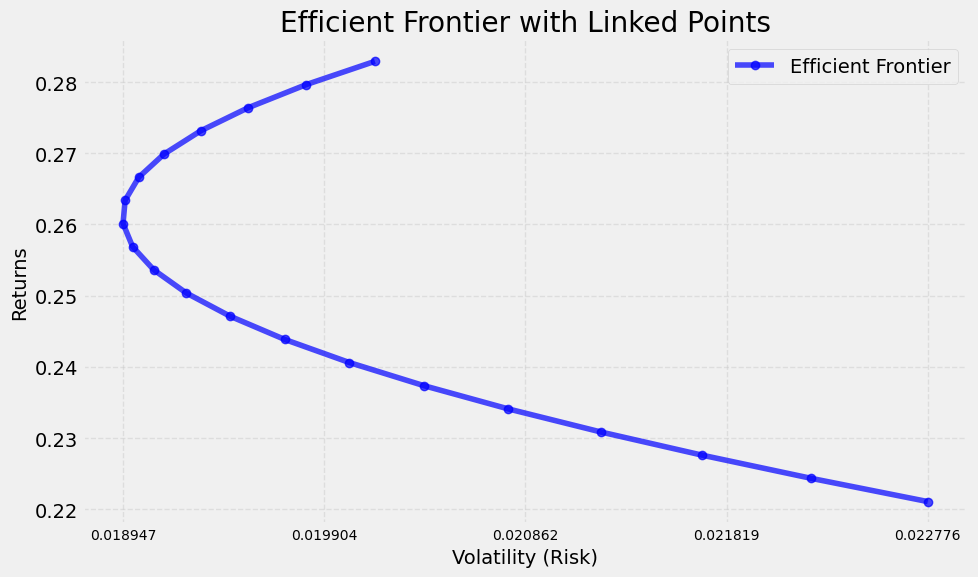

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the Efficient Frontier with linked points
plt.figure(figsize=(10, 6))
plt.plot(vols, rets, marker='o', linestyle='-', color='blue', alpha=0.7, label="Efficient Frontier")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Returns")
plt.title("Efficient Frontier with Linked Points")
plt.grid(visible=True, linestyle="--", alpha=0.5)

# Format the x-axis with more readable tick labels
plt.xticks(np.linspace(min(vols), max(vols), num=5), rotation=00, fontsize=10)  # Fewer ticks, rotated for readability

plt.legend()
plt.tight_layout()
plt.show()


### N-Asset Efficient Frontier - Running the Optimizer

In [58]:
df_1.head()

Ticker,AAPL,AMZN,GOOG,NFLX,TSLA
Date,,,,,
2020-01-03,-0.009770,-0.012213,-0.004919,-0.011926,0.029203
2020-01-06,0.007937,0.014776,0.024358,0.030014,0.019072
2020-01-07,-0.004714,0.002089,-0.000624,-0.015242,0.038067
2020-01-08,0.015958,-0.007839,0.007850,0.025404,0.048033
2020-01-09,0.021018,0.004788,0.010984,-0.010668,-0.022189


#### Generate a Range of Portfolio Weights:

In [72]:
n_points = 20
weights = [np.array([w, 1 - w]) for w in np.linspace(0, 1, n_points)]


This line of code generates 20 different combinations of weights for a portfolio consisting of two assets. The weight w for the first asset ranges from 0 to 1, and the weight for the second asset is 1 - w.

### Calculate Portfolio Returns and Volatility:

In [77]:
# Create a function that compute the annualized returns, volatility and sharpe ratio of a set of returns
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [78]:
rets = [portfolioreturn(w, er[l]) for w in weights]
vols = [portfolio_vol(w, returns.cov().loc[l, l]) for w in weights]

In [79]:
# Calculate the annualized exprected returns
er = annualize_rets(df_1["2020-01-03":"2024-11-18"], 12)
er

Ticker
AAPL    0.008636
AMZN    0.004308
GOOG    0.006670
NFLX    0.003219
TSLA    0.012889
dtype: float64

In [61]:
cov = df_1["2020-01-03":"2024-08-22"].cov()
cov.shape

(5, 5)

In [62]:
# display the covariance matrix
cov

Ticker,AAPL,AMZN,GOOG,NFLX,TSLA
Ticker,,,,,
AAPL,0.000418,0.000283,0.000280,0.000280,0.000438
AMZN,0.000283,0.000528,0.000312,0.000371,0.000425
GOOG,0.000280,0.000312,0.000426,0.000278,0.000355
NFLX,0.000280,0.000371,0.000278,0.000913,0.000462
TSLA,0.000438,0.000425,0.000355,0.000462,0.001771


In [63]:
# compute the annualized sharpe ratio of a set of returns
sharpe_ratio(df_1, 0.03, 12).sort_values()

Ticker
GOOG   -0.321455
AMZN   -0.317070
AAPL   -0.298273
NFLX   -0.252832
TSLA   -0.113820
dtype: float64

In [64]:
# Create a function that computes the return on a portfolio from constituent returns and weights
# weights are a numpy array or N x 1 matrix and returns are a numpy array or Nx1 matrix
def portfolio_return(weights, returns):
    return weights.T @ returns

# Create a function that computes the volatility of a portfolio from a covariance matrix and constituent weights
# weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

In [65]:
l = ["AMZN", "AAPL", "NFLX", "GOOG", "TSLA"]
er[l]

Ticker
AMZN    0.003191
AAPL    0.009099
NFLX    0.001651
GOOG    0.006556
TSLA    0.009830
dtype: float64

In [66]:
cov.loc[l,l]

Ticker,AMZN,AAPL,NFLX,GOOG,TSLA
Ticker,,,,,
AMZN,0.000528,0.000283,0.000371,0.000312,0.000425
AAPL,0.000283,0.000418,0.000280,0.000280,0.000438
NFLX,0.000371,0.000280,0.000913,0.000278,0.000462
GOOG,0.000312,0.000280,0.000278,0.000426,0.000355
TSLA,0.000425,0.000438,0.000462,0.000355,0.001771


In [67]:
weights = np.repeat(0.20, 5)
portfolio_return(weights, er[l])

0.006065358607378402

In [68]:
portfolio_vol(weights, cov.loc[l,l])

0.021001025981091766

### Calculate the Sharpe Ratio and Identify the Optimal Portfolio:

In [81]:
risk_free_rate = 0.02  # Assuming a 2% risk-free rate
sharpe_ratios = [(ret - risk_free_rate) / vol for ret, vol in zip(rets, vols)]
max_sharpe_index = np.argmax(sharpe_ratios)  # Index of the maximum Sharpe Ratio
optimal_return = rets[max_sharpe_index]
optimal_volatility = vols[max_sharpe_index]


### Plot the Efficient Frontier and Highlight the Optimal Portfolio:

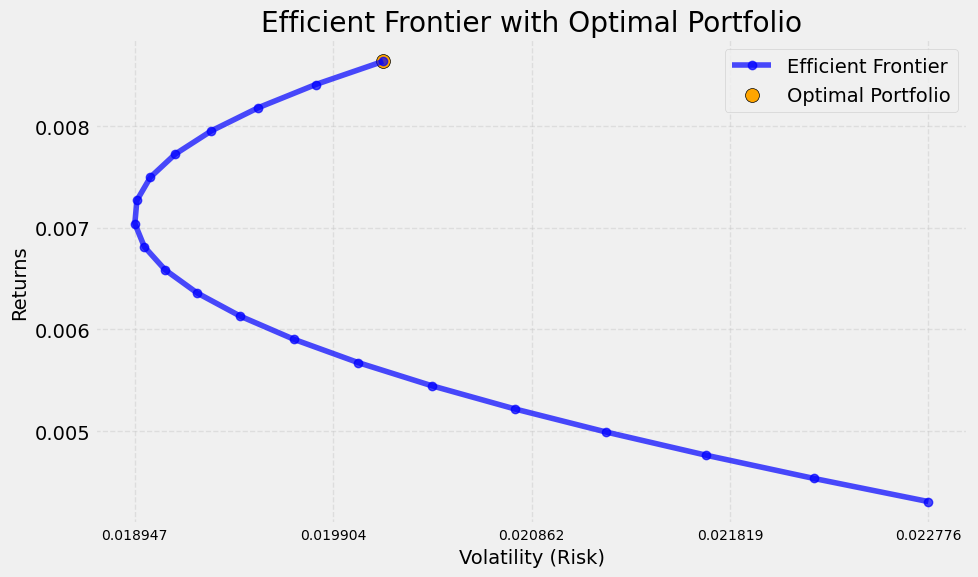

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(vols, rets, marker='o', linestyle='-', color='blue', alpha=0.7, label="Efficient Frontier")
plt.scatter(optimal_volatility, optimal_return, c='orange', edgecolors='black', s=100, label='Optimal Portfolio')
plt.xlabel("Volatility (Risk)")
plt.ylabel("Returns")
plt.title("Efficient Frontier with Optimal Portfolio")
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.xticks(np.linspace(min(vols), max(vols), num=5), rotation=00, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


## Evaluating Investment Performance for a portfolio of stocks, bonds & commodities

Sharing your insights is a key step in the data science process. The ability to clearly and accurately communicate your findings is crucial! This step bridges the gap between analyzing data and helping drive better decision making and business value. Our efforts of loading, cleaning, transforming, and analyzing data will be far less impactful if we cannot effectively communicate the key messages.

Let's start by importing the packages that we need and creating our `stocksAndBonds` DataFrame again and we will keep the `Adj Close` as the original value.

In [84]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [85]:
# Setting dates for the DataFrames
startdate = '2021-01-01'
enddate = '2022-12-31'

# Fetching data
# Using 'SPY ETF' as a proxy for general market
stocks = yf.download('SPY', start=startdate, end=enddate)[['Adj Close']]

# Using '20 year ETF' as a proxy for bonds
bonds = yf.download('TLT', start=startdate, end=enddate)[['Adj Close']]

# Using 'USO ETF' as a proxy for the price of oil
oil = yf.download('USO', start=startdate, end=enddate)[['Adj Close']]

stocksAndBonds = pd.concat([stocks, bonds, oil], axis=1, join='inner')

stocksAndBonds.columns = ['SPY','TLT','USO']

stocksAndBonds.head()

/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/zakariyaboutayeb/anaconda3/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hour

,SPY,TLT,USO
Date,,,
2021-01-04,349.471649,141.746429,32.380001
2021-01-05,351.878632,140.693741,33.939999
2021-01-06,353.982300,137.805573,34.110001
2021-01-07,359.241608,136.590881,34.529999
2021-01-08,361.288422,136.150009,35.430000


We can create a line chart to show the trend in the value of 'SPY' over time. We can create two Series for our visual: years and revenue. 

We'll use the `title` function to add a title to the plot, use the `xlabel` function to label the x axis, and use the `ylabel` function to add a label for the y axis. We can also use the `xticks` function to change the appearance of the labels on the x axis.

Next, we can control the size of the plot by using the `figure` function and the `figsize` parameter. We can use this to make the size of our plot bigger and easier to read. The default values for figsize are 6.4 and 4.8, so we can increase these values to increase the size of our chart.

We have the ability to control the limits of the chart using the `xlim` and `ylim` functions. Let's update the y-axis to span between 340 and 500. We can see that the shape of the line stays the same, but the minimum and maximum value of the axis changed.

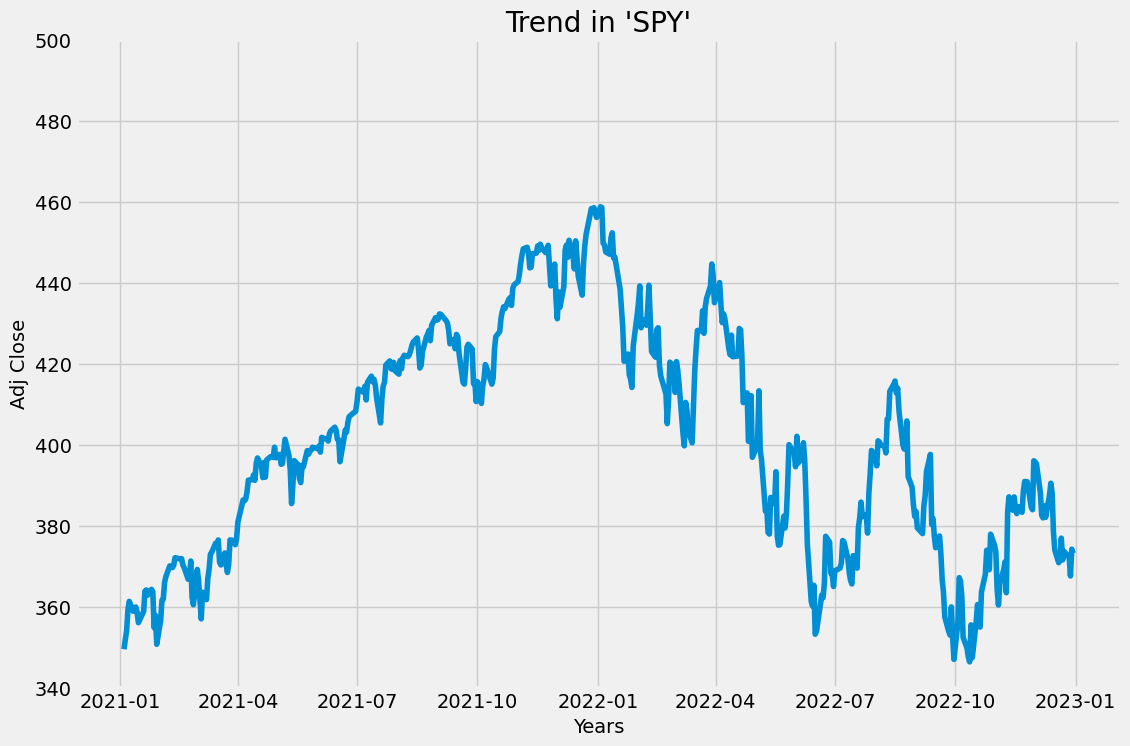

In [90]:
# Create years and stock_value to populate the line chart
years = stocksAndBonds.index
stock_value = stocksAndBonds['SPY']

# Set size of plot
plt.figure(figsize=(12, 8))

plt.plot(years, stock_value)

# Add titles and labels
plt.title('Trend in \'SPY\'')
plt.xlabel('Years')
plt.ylabel('Adj Close')
plt.xticks(rotation=00);

# Add limits to the axes
plt.ylim(340, 500);

Bar plots allow us to visualize a comparison between different categories or columns in our data set. Typically, we would aggregate multiple values within a category and compare these aggregates across categories.

In [87]:
# Calculate the mean Adj Close for each stock in stocksAndBonds
stock_mean = stocksAndBonds.mean()
stock_mean

SPY    400.648604
TLT    119.780367
USO     59.905089
dtype: float64

In [88]:
# Convert stock_mean into a DataFrame: bar_plot
bar_plot = pd.DataFrame(data = stock_mean, columns = ['mean_value'])
bar_plot

,mean_value
SPY,400.648604
TLT,119.780367
USO,59.905089


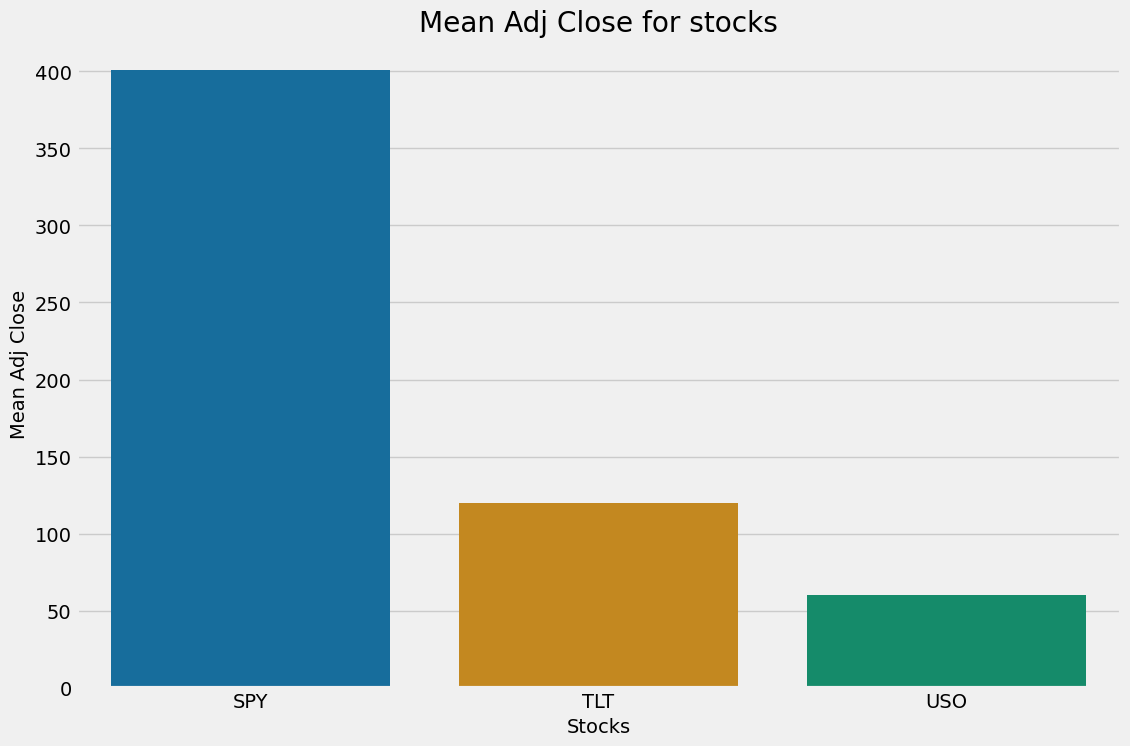

In [89]:
# Set plot size
plt.figure(figsize=(12, 8))

# Create bar plot to compare the means of our stocks
sns.barplot(x=bar_plot.index, y='mean_value', data=bar_plot, palette = 'colorblind');

# Add titles and labels
plt.title('Mean Adj Close for stocks')
plt.ylabel('Mean Adj Close')
plt.xlabel('Stocks');